In [156]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from src import data
from portfolio_design.src.data import get_monthly_market_data
from portfolio_design.src import analysis as an
from portfolio_design.src import edhec_risk_kit as erk

%matplotlib inline

In [158]:
md_df = get_monthly_market_data(
  tickers = ['AC.TO', 'SOXX', 'DIS', 'NVDA', 'SPY'],
  interval = '1mo',
  returns_only = False
).ffill(axis = 0)

r_df = (md_df['adjusted_close'] / md_df['open'] - 1).ffill(axis = 0)

r_df.head()

[*********************100%***********************]  5 of 5 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.9/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,AC.TO,DIS,NVDA,SOXX,SPY
date,,,,,
1962-06-12,NaN,NaN,NaN,NaN,NaN
1962-09-11,NaN,NaN,NaN,NaN,NaN
1962-12-18,NaN,NaN,NaN,NaN,NaN
1963-03-12,NaN,NaN,NaN,NaN,NaN
1963-06-07,NaN,NaN,NaN,NaN,NaN


In [159]:
r_pre_df = r_df['2015':'2020-01-01']
r_post_df = r_df['2020-02-01':]

In [161]:
er_pre = erk.annualize_rets(r_pre_df, 12)
er_pre

AC.TO    0.251549
DIS     -0.338582
NVDA     0.336359
SOXX    -0.296009
SPY     -0.524859
dtype: float64

In [162]:
er_post = erk.annualize_rets(r_post_df, 12)
er_post

AC.TO   -0.350884
DIS      0.244896
NVDA     0.745721
SOXX     0.363003
SPY      0.041442
dtype: float64

In [163]:
er_pre_cov = r_pre_df.cov()
er_post_cov = r_post_df.cov()
er_pre_corr = r_pre_df.corr()
er_post_corr = r_post_df.corr()

In [164]:
er_pre_corr

,AC.TO,DIS,NVDA,SOXX,SPY
AC.TO,1.000000,0.129125,0.240478,0.297950,0.263414
DIS,0.129125,1.000000,0.050579,0.385495,0.618455
NVDA,0.240478,0.050579,1.000000,0.705225,0.417677
SOXX,0.297950,0.385495,0.705225,1.000000,0.784767
SPY,0.263414,0.618455,0.417677,0.784767,1.000000


In [165]:
er_post_cov

,AC.TO,DIS,NVDA,SOXX,SPY
AC.TO,0.076188,0.024690,0.005302,0.017885,0.015731
DIS,0.024690,0.015661,0.004515,0.008295,0.007985
NVDA,0.005302,0.004515,0.011933,0.004643,0.003716
SOXX,0.017885,0.008295,0.004643,0.007073,0.005817
SPY,0.015731,0.007985,0.003716,0.005817,0.005607


In [166]:
weights = np.repeat(0.25, 5)
print(erk.portfolio_return(weights, er_pre))
print(erk.portfolio_return(weights, er_post))

-0.1428853626379627
0.2610444607596141


In [167]:
print(erk.portfolio_vol(weights, er_pre_cov))
print(erk.portfolio_vol(weights, er_post_cov))

0.06920463428859316
0.1400045693558858


In [168]:
print(erk.portfolio_vol(weights, er_pre_cov))
print(erk.portfolio_vol(weights, er_post_cov))

0.06920463428859316
0.1400045693558858


In [169]:
# s = ['Games', 'Fin']
# ind = erk.get_ind_returns()
# er = erk.annualize_rets(ind['1996':'2000'], 12)
# cov = ind['1996':'2000'].cov()

# rets = [erk.portfolio_return(w, er[s]) for w in weights]
# vols = [erk.portfolio_vol(w, cov.loc[s, s]) for w in weights]

# ef = pd.DataFrame({
#   'R': rets,
#   'V': vols
# })
# ef.plot.scatter(x = 'V', y = 'R');

<AxesSubplot:xlabel='Volatility'>

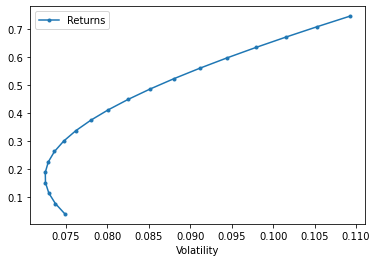

In [178]:
s = ['SPY', 'NVDA']
er_s = er_post[s]
er_s_cov = er_post_cov.loc[s, s]
erk.plot_ef2(20, er_s, er_s_cov)